## K-menas on heart disease data

### There are three main criteria to successfully apply k-means to clustering problems.
#### 1. The cluster number k: To determine the best value for k is not trivial and we need to run k-means with several k values and choose the one that makes most sense to us. 
#### 2. Clusters are isotropic (i.e. symmetrical), meaning that they are uniform in all directions and the edges curve outward. 
#### 3.Similar variance: K-means also assumes all clusters have similar variance.

Source: http://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [26]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.patches import Patch
import matplotlib.patches as patches
import math
import numpy as np
from numpy import percentile
from numpy.random import seed
import os
import datetime
import time
import re
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns

In [28]:
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans


In [29]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_colwidth', -1) 

In [30]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

In [31]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
     postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df0 = pd.read_sql_query('select * from heartdisease', con=engine)


In [9]:
heartdisease_df = df0.copy()

In [10]:
# Define the features and the oautcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]
# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)

# Binarize `y` so that `1` means heart disease diagnosis and `0` means no diagnosis
Y = np.where(y > 0, 0, 1)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.35, random_state = 
465)

## Create a pipeline 

In [12]:
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
cluster = KMeans(random_state=1337)
make_pipeline(scaler, cluster)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(random_state=1337))])

In [32]:
from sklearn.pipeline import Pipeline
ks = range(3,5)
pipe = Pipeline([
        ('scale', StandardScaler()),
        ('reduce_dims', PCA(n_components=2)),
        ('clf', KMeans(n_clusters=3))])

param_grid = dict(
                  reduce_dims__n_components=[2, 4, 6,12],
                  #clf__C=np.logspace(-4, 1, 6),
                  #clf__kernel=['rbf','linear']
                  clf__n_clusters=[1,2]
                  )

In [33]:
grid = GridSearchCV(
    pipe, 
    param_grid=param_grid, 
    cv=3, 
    n_jobs=1,
    verbose=0,
    )
grid.fit(X_train, y_train)
print(grid.score(X_test, y_test))
print(grid.best_score_)
print(grid.best_estimator_)

-244.672175147271
-145.3828082606153
Pipeline(steps=[('scale', StandardScaler()),
                ('reduce_dims', PCA(n_components=2)),
                ('clf', KMeans(n_clusters=2))])


In [34]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std_pca = PCA(n_components=2).fit_transform(X_std)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D32074908>,
      dtype=object)

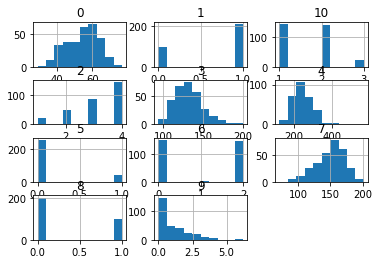

In [37]:
# Get all numerica columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
X_num = X.select_dtypes(include=numerics)
num_cols = X_num.columns
# Plot all of them
X[num_cols].hist()

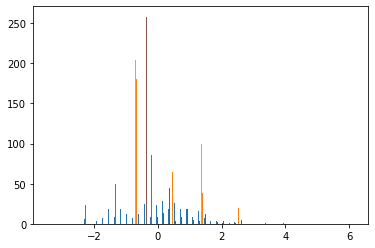

In [38]:
# Show the same but standardized
plt.hist(X_std, bins='auto')
plt.show() 

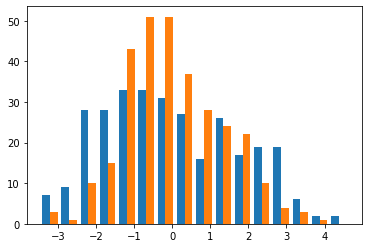

In [40]:
# Show the same but standardized and PCA fitted
plt.hist(X_std_pca, bins='auto')
plt.show() 

### Focus on only two PCAs so make it possible to plot the results

In [42]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=2, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std_pca)
y_pred = kmeans_cluster.predict(X_std_pca)

21.9 ms ± 854 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [43]:
y_pred.shape, X_std_pca.shape

((303,), (303, 2))

In [44]:
X_std_pca.shape[0]

303

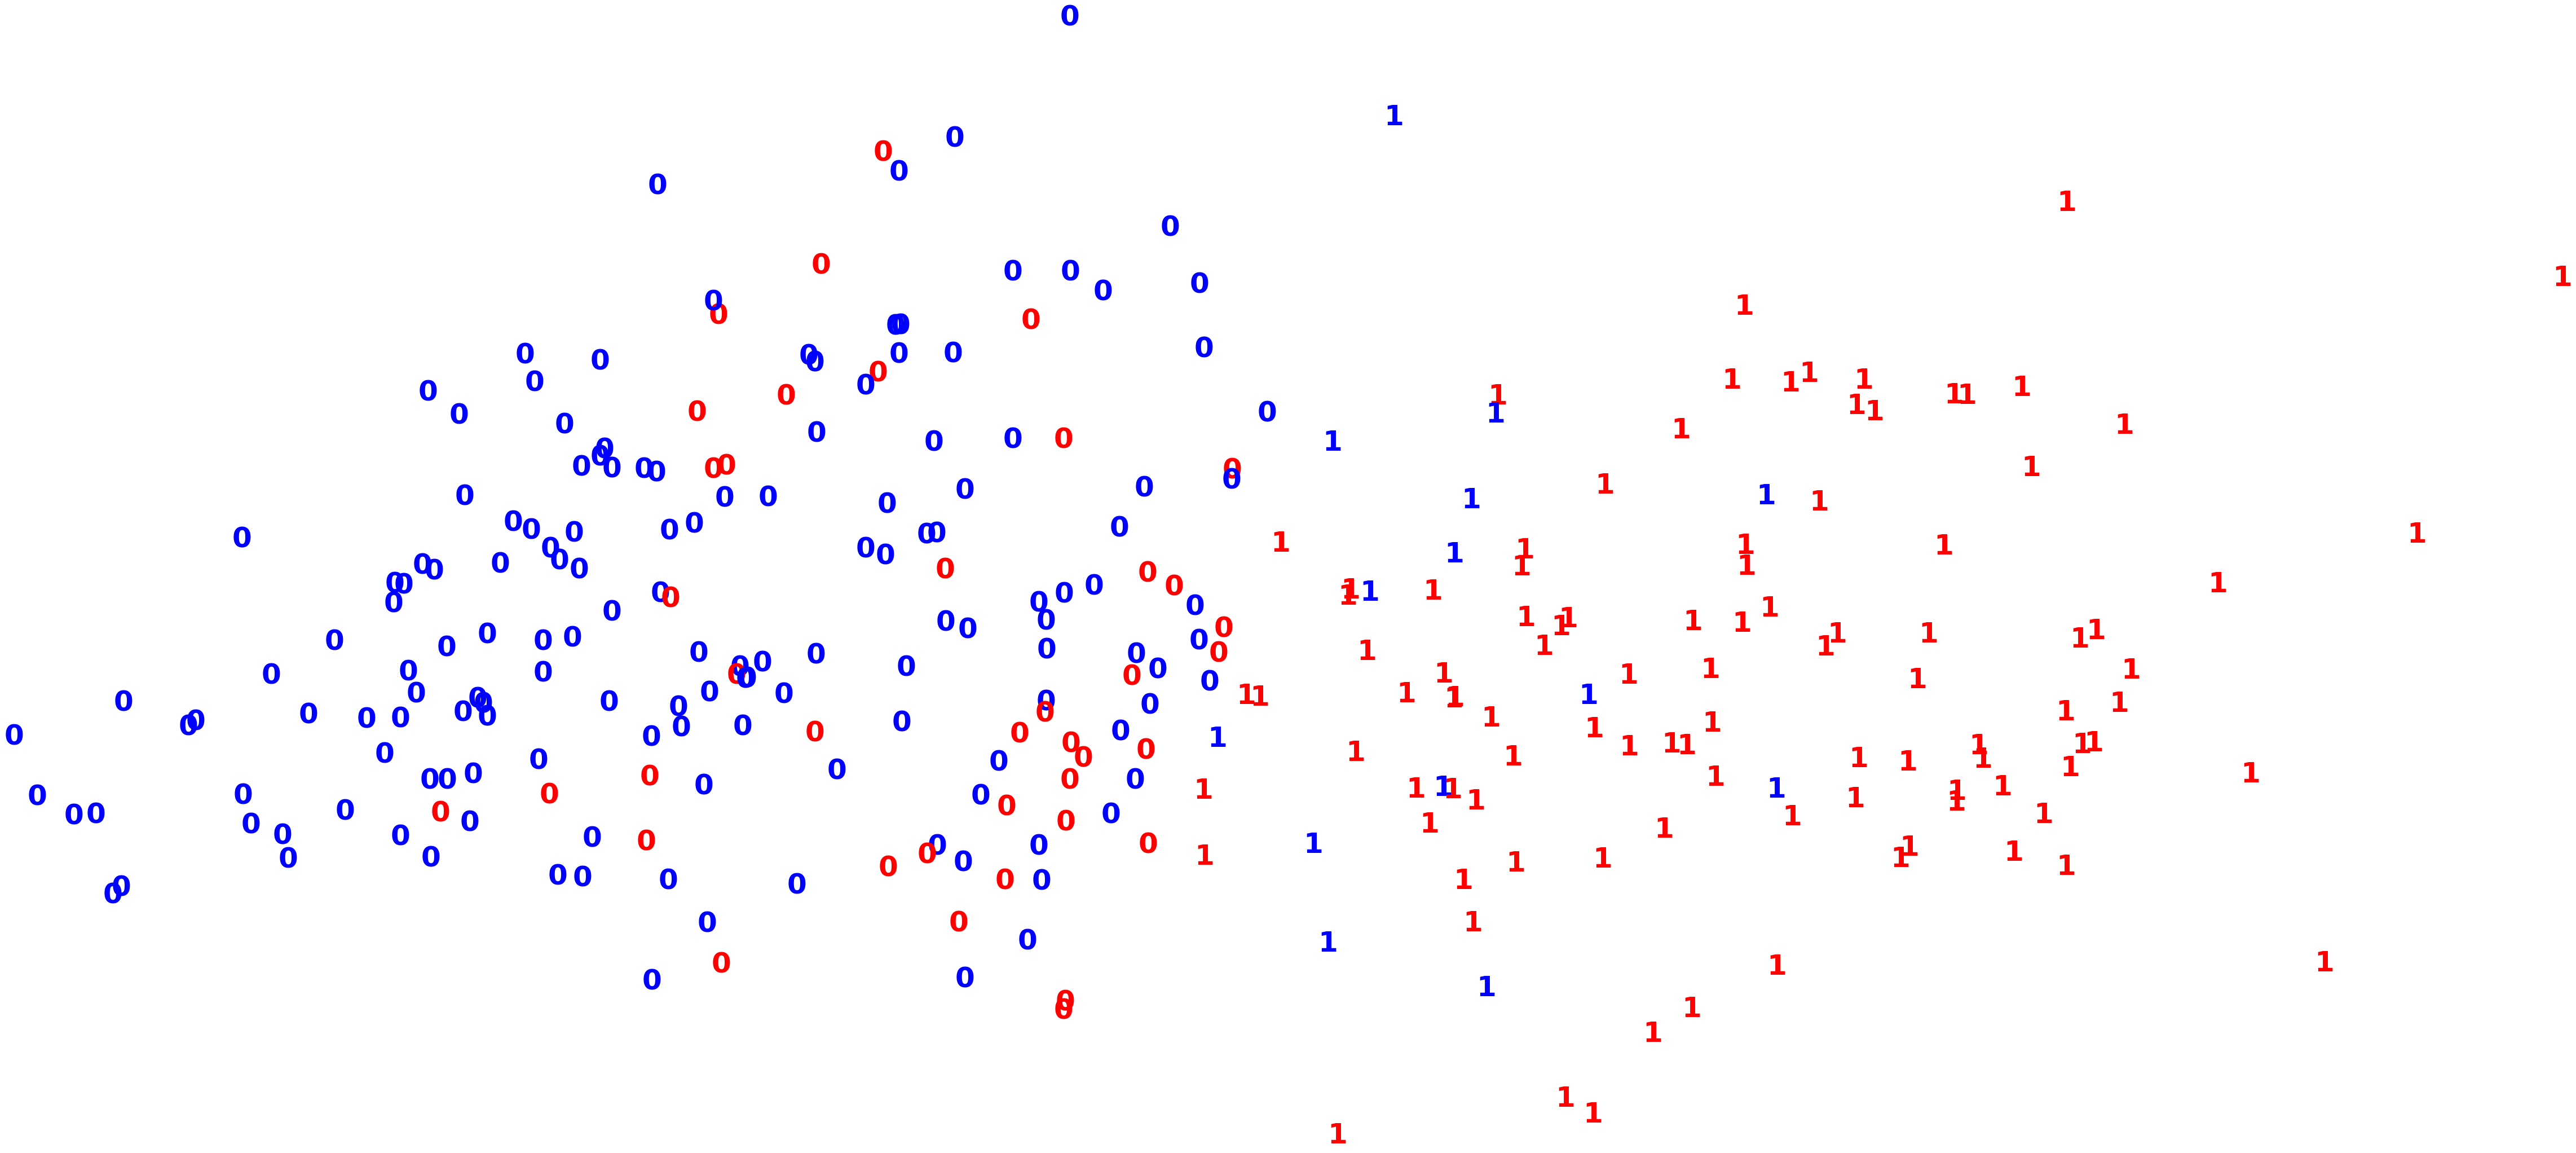

In [45]:
#pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(X_std_pca.shape[0]):
    plt.text(X_std_pca[i, 0], X_std_pca[i, 1], str(y_pred[i]),
             color=colours[Y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()